# SLO Twitter Data Analysis  - Retweet Statistics

Setup the Jupyter Notebook kernel for SLO data analysis.

In [1]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-7-10-19-with-irrelevant-tweets-excluded.csv",
    "csv", False)

## Count and Percentage of ReTweets Across Entire Dataset and by Company:


This code cell provides statistics on whether a Tweet is Retweet across the entire dataset as well as when grouped by the companies each is associated with.<br>



In [2]:
    print(f"ReTweeted Statistics for entire Twitter dataset:")
    print(tweet_dataframe["retweeted_derived"].value_counts())
    print(tweet_dataframe["retweeted_derived"].value_counts(normalize=True))
    print()

    print(f"ReTweeted Statistics for Tweets by Company for entire Twitter dataset:")
    print(tweet_dataframe.groupby(['company_derived_designation', "retweeted_derived"]).size())
    print()

ReTweeted Statistics for entire Twitter dataset:
True     440548
False    214070
Name: retweeted_derived, dtype: int64
True     0.67298485529
False    0.32701514471
Name: retweeted_derived, dtype: float64

ReTweeted Statistics for Tweets by Company for entire Twitter dataset:
company_derived_designation  retweeted_derived
adani                        False                104980
                             True                 319457
bhp                          False                 36725
                             True                  26314
cuesta                       False                    73
                             True                     28
fortescue                    False                  7392
                             True                   4254
iluka                        False                  2484
                             True                    477
multiple                     False                  3543
                             True                

    
It seems most of the Tweets in our dataset are ReTweets.  If we removed the ReTweets associated with Adani, we would have a more balanced dataset.<br>
    


## Graph of ReTweet Percentages by Tweet Company Association:


Plot of whether a Tweet is a ReTweet or not by the company they are associated with.  Y-axis depicts the percentage of all Tweets for that company.  X-axis left bar depicts Non-Retweets and right bar depicts ReTWeets.<br>



Percentage of All Tweets for a Company that Are or Aren't ReTweets: 


<Figure size 432x288 with 0 Axes>

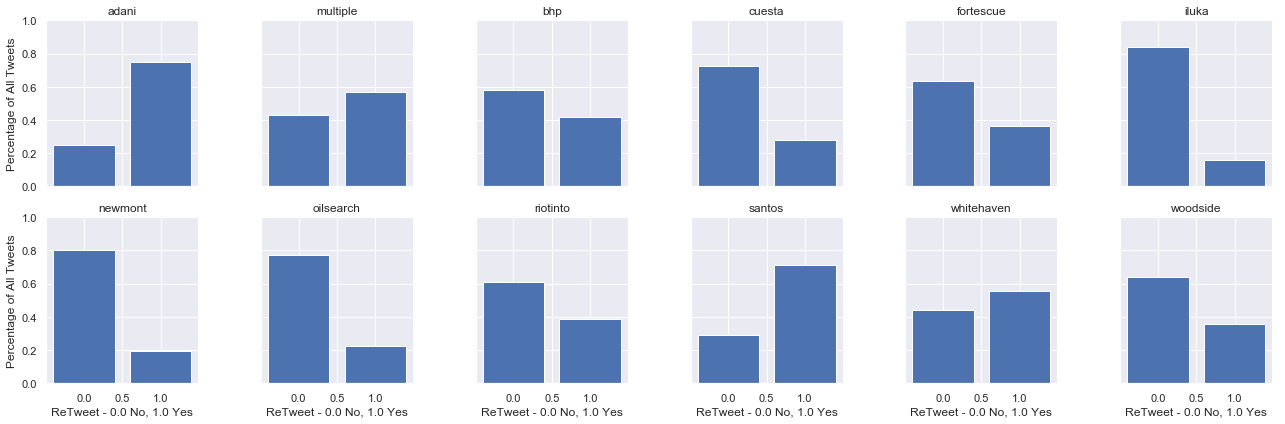

In [3]:
    print(f"Percentage of All Tweets for a Company that Are or Aren't ReTweets: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[["retweeted_derived", 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(tweet_util_v2.bar_plot, "retweeted_derived")
    grid.set_titles('{col_name}')
    grid.set_xlabels("ReTweet - 0.0 No, 1.0 Yes").set_ylabels("Percentage of All Tweets")
    plt.show()


We see that most Tweets about "Adani" are ReTweets while most Tweets for many of the other companies are not ReTweets.<br>



## Graph of ReTweet Percentages by ReTweet Count and Tweet Company Association:


Plot of the ReTweet counts for each Tweet against what percentage Tweets with that specific ReTweet count value make up the entire Twitter dataset.<br> 



Percentage Composition of All Tweets for a Company for Most ReTweeted Tweets by their ReTweet Counts:


<Figure size 432x288 with 0 Axes>

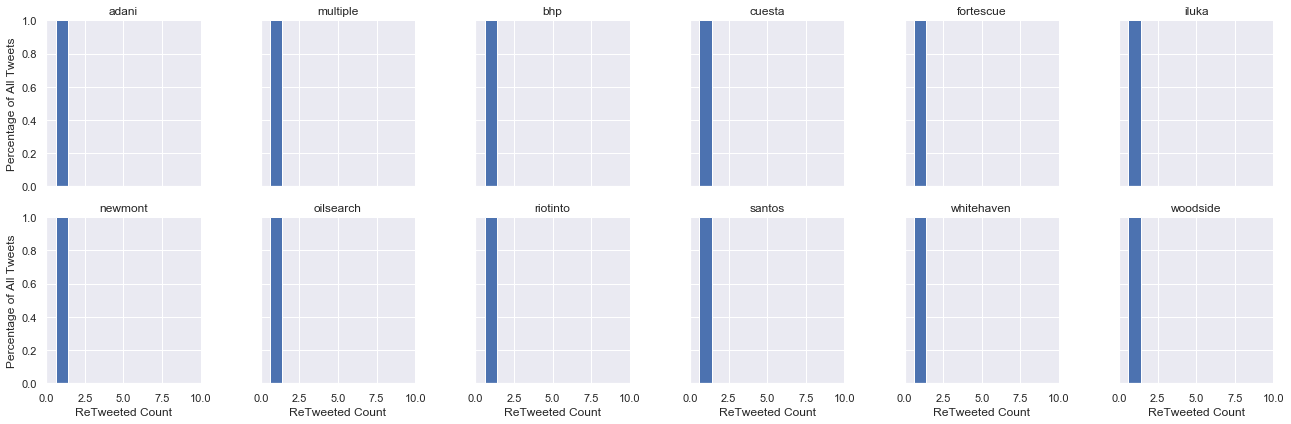

In [4]:
    plt.figure()
    print(f"Percentage Composition of All Tweets for a Company for Most ReTweeted Tweets by their ReTweet Counts:")
    grid = sns.FacetGrid(tweet_dataframe[['tweet_id', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1), xlim=(0, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot_zipf, 'tweet_id')
    grid.set_titles('{col_name}')
    grid.set_xlabels('ReTweeted Count').set_ylabels("Percentage of All Tweets")
    plt.show()


We can see that for Adani the ReTweet count can go up quite high.  However, for the the other companies the ReTweet count does not go much past 3 or so.<br>



## Highest ReTweet Counts and the Number of Tweets with those Counts by Company:

    
We compute statistics for the ReTweet count for the most ReTweeted Tweets.<br>
   


In [5]:
    print(f"\nReTweet counts for the Top (most) Retweeted Tweets.\n")
    print(tweet_dataframe[['company_derived_designation', 'tweet_id']].groupby('company_derived_designation')
          .apply(lambda x: x['tweet_id'].value_counts().value_counts(normalize=False)
                 .sort_index(ascending=False).head(3)))


ReTweet counts for the Top (most) Retweeted Tweets.

company_derived_designation   
adani                        2         1
                             1    424435
bhp                          1     63039
cuesta                       1       101
fortescue                    1     11646
iluka                        1      2961
multiple                     1      8205
newmont                      1       888
oilsearch                    1      1554
riotinto                     1     25371
santos                       1     86279
whitehaven                   1     14718
woodside                     1     15419
Name: tweet_id, dtype: int64



Unsurprisingly at this point, Adani Tweets have the highest counts for ReTweets.<br>

**TODO: Understand what the values in the right column represent.  Are they the number of Tweets with that count?**<br>

**TODO: Why are these values different from our own code's in the section titled "Tweet ID's and ReTweet Counts:"?**<br>



## Top ReTweeted Tweet ID's and Percent Composition of Associated Company's Tweets:


Statistics that give the Tweet ID of the most ReTweeted Tweets and what percentage of the entire dataset they comprise.<br>



In [6]:
    print(
        f"\nWhat Percentage of All Tweets for Given Company across the entire dataset does the Top (most) Retweeted "
        f"Tweets Comprise?.\n")
    print(tweet_dataframe[['company_derived_designation', 'tweet_id']].groupby('company_derived_designation')
          .apply(lambda x: x['tweet_id'].value_counts(normalize=True).head(5)))


What Percentage of All Tweets for Given Company across the entire dataset does the Top (most) Retweeted Tweets Comprise?.

company_derived_designation                    
adani                        832747709622652928    0.000004712125
                             914807453375537152    0.000002356062
                             919519409823084549    0.000002356062
                             874923201306005504    0.000002356062
                             864966034557616128    0.000002356062
bhp                          716951938823118850    0.000015863196
                             702070691852476416    0.000015863196
                             517173077256306688    0.000015863196
                             838811003680759809    0.000015863196
                             491418117474504706    0.000015863196
cuesta                       486270007211732992    0.009900990099
                             369474354565754880    0.009900990099
                             4490346


The higher the percentage values given in the right column, the more popular a Tweet is and the more they were ReTweeted and the more they weigh heavily as part of that company's set of associated Tweets.<br>



## ReTweet Counts and Percentages Across Entire Dataset:

In [7]:
    print("Note: These values based on 'retweeted_derived' boolean attribute:")

    yes_reweeted = tweet_dataframe.loc[tweet_dataframe['retweeted_derived'] == True]
    print(f"The number of Re-Tweets in the dataset: {yes_reweeted.shape}")
    no_reweeted = tweet_dataframe.loc[tweet_dataframe['retweeted_derived'] == False]
    print(f"The number of Non Re-Tweets in the dataset: {no_reweeted.shape}")

    print(f"The percentage of Tweets that are ReTweets in the dataset: "
          f"{yes_reweeted.shape[0] / tweet_dataframe.shape[0]}")
    print(f"The percentage of Tweets that are not ReTweets in the dataset: "
          f"{no_reweeted.shape[0] / tweet_dataframe.shape[0]}")

Note: These values based on 'retweeted_derived' boolean attribute:
The number of Re-Tweets in the dataset: (440548, 37)
The number of Non Re-Tweets in the dataset: (214070, 37)
The percentage of Tweets that are ReTweets in the dataset: 0.6729848552896498
The percentage of Tweets that are not ReTweets in the dataset: 0.32701514471035015



Approximately 2/3rd of our dataset is comprised of ReTweets.<br>



## Original Tweet Text of ReTweeted Tweets:

In [12]:
# Import CSV dataset and convert to dataframe.
tweet_dataframe_extra = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-7-10-19-with-irrelevant-tweets-excluded-extra.csv",
    "csv", False)
    
has_retweeted_text = tweet_dataframe_extra.loc[tweet_dataframe_extra["retweeted_status_full_text"].notnull()]
print(f"# of re-tweets with included original text of the original re-tweeted Tweet is: "
      f"{has_retweeted_text.shape}")
print(f"# of re-tweets without included original text of the original re-tweeted Tweet is: "
      f"{yes_reweeted.shape[0] - has_retweeted_text.shape[0]}")

# of re-tweets with included original text of the original re-tweeted Tweet is: (439913, 14)
# of re-tweets without included original text of the original re-tweeted Tweet is: 635



We have the original ReTweeted Tweet's full text for most, but not all, of our Tweets in our dataset.<br>



## Tweet ID's and ReTweet Counts:

In [9]:
    retweet_frequency = tweet_dataframe[["tweet_id", "tweet_retweet_count"]]
    print("Tweet ID's and ReTweet Count for Tweets in our Dataset (Descending head):")
    print(retweet_frequency.sort_values(by=["tweet_retweet_count"], ascending=False).head(10))

Tweet ID's and ReTweet Count for Tweets in our Dataset (Descending head):
                  tweet_id  tweet_retweet_count
488493  989514262174318592                20066
488458  989313290298785792                20066
620872  979610667714932736                18551
620858  979340630630350848                18551
620861  979459217403686912                18551
620875  979627668185337858                18551
620896  980029058644819970                18551
620863  979467152288899073                18551
620902  980127541909270530                18551
620859  979449557598679040                18551



The integer values on the far left appear to the row index value of the Tweet in our dataset.  However, these row index values are always two lower than they should be.  For example, for the top Tweet in the list, a row index value of 498071 + 2 = 498073 would be the actual row corresponding to the Tweet with a ReTweet count of 98886.  The scientific notation float values appear to be the Tweet ID's.  We need to do further analysis into how to change the display of the Tweet ID's and why the row index values are off by 2.<br>



## Original ReTweeted Tweet ID's and ReTweet Counts:

In [10]:
    retweet_frequency = tweet_dataframe_extra[["retweeted_status_id", "retweeted_status_retweet_count"]]
    print("Tweet ID's and ReTweet Count for the Original ReTweeted Tweet (Descending head):")
    print(retweet_frequency.sort_values(by=["retweeted_status_retweet_count"], ascending=False).head(10))

Tweet ID's and ReTweet Count for the Original ReTweeted Tweet (Descending head):
        retweeted_status_id  retweeted_status_retweet_count
498068   9.827836696298e+17                         98886.0
634811   9.730206199348e+17                         24691.0
633503   9.682302478492e+17                         24639.0
633515   9.682302478492e+17                         24639.0
633526   9.682302478492e+17                         24639.0
633600   9.682302478492e+17                         24635.0
633621   9.682302478492e+17                         24635.0
498327   9.927912492697e+17                         23823.0
498322   9.927912492697e+17                         23823.0
498333   9.927912492697e+17                         23823.0



According to this, we have a few original ReTweeted Tweets whose ReTweet counts are high.<br>

**Note: The original ReTweeted Tweet and the Tweet they were extracted from seem to share the same values.  We should do further analysis into why this is.**<br>



## ReTweet and Non-ReTweet Counts by Company - Separated:

In [11]:
    print("Retweet counts by company:")
    yes_by_company = \
        pd.DataFrame(yes_reweeted).groupby(["company_derived_designation"]).size().reset_index(name="counts")
    print(f"{yes_by_company}\n")
    print("Non Retweet counts by company:")
    no_by_company = \
        pd.DataFrame(no_reweeted).groupby(["company_derived_designation"]).size().reset_index(name="counts")
    print(f"{no_by_company}\n")

Retweet counts by company:
   company_derived_designation  counts
0                        adani  319457
1                          bhp   26314
2                       cuesta      28
3                    fortescue    4254
4                        iluka     477
5                     multiple    4662
6                      newmont     175
7                    oilsearch     349
8                     riotinto    9831
9                       santos   61242
10                  whitehaven    8205
11                    woodside    5554

Non Retweet counts by company:
   company_derived_designation  counts
0                        adani  104980
1                          bhp   36725
2                       cuesta      73
3                    fortescue    7392
4                        iluka    2484
5                     multiple    3543
6                      newmont     713
7                    oilsearch    1205
8                     riotinto   15540
9                       santos   25037
10   


Similar to the ReTweet count statistics provided at the beginning of this notebook file only separated between ReTweets and non-ReTweets into two separate groups according to associated company.<br>

